In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
data = pd.read_parquet("data.parquet")

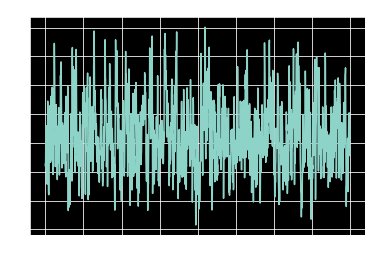

In [4]:
plt.plot(np.arange(len(data)),data["WfeRms"])
plt.grid()
#plt.xlim([0,200])

In [6]:
data = pd.read_parquet("/fsx/CASES/zen30az000_OS7/pssn-fwhm_domeseeing.parquet")


In [4]:
fwhm = data['PSSnFwhm'][0][1]*180*3600/np.pi
fwhm

0.1496835899015261

In [7]:
fwhm = data['PSSnFwhm'][0][1]*180*3600/np.pi
fwhm

0.14981464402833158

In [186]:
(0.5e-6/8.365)*180*3600/np.pi


0.0123290380303106

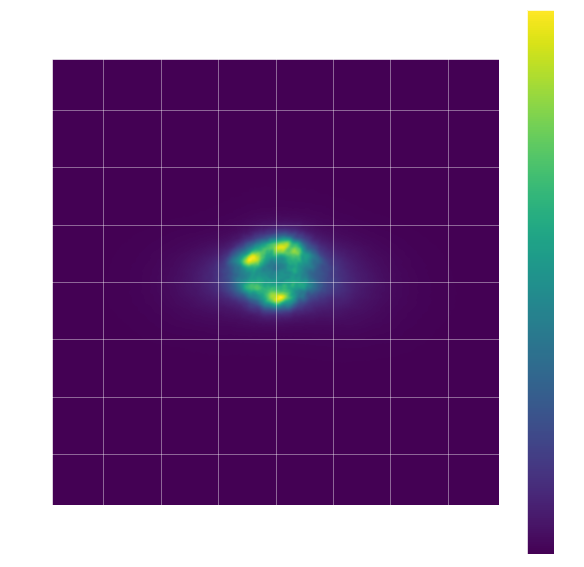

In [5]:
frame = np.vstack(data["DetectorFrame"]).reshape(769,769)
fig,ax = plt.subplots(figsize=(10,10))
l = np.asarray([-1.,1,-1,1])
px_scale = 0.5e-6/25.5/4 * 180*3600/np.pi
l *= px_scale*769/2
h = ax.imshow(frame/frame.max(),extent=l, vmin=0)
o = np.arange(101)*2*np.pi/101
(x, y) = (np.cos(o),np.sin(o))
#ax.plot(x*fwhm/2,y*fwhm/2,"k")
ax.grid(alpha=0.5)
#ax.set_xlim([-0.25,0.25])
#ax.set_ylim([-0.25,0.25])
ax.set_xlabel('X [arcsec]')
ax.set_ylabel('Y [arcsec]')
fig.colorbar(h,ax=ax)


In [65]:
fwhm_free = 0.0000021694478283015143*180*3600/np.pi
fwhm,fwhm_free


(0.47743379434253974, 0.44748073596779586)

In [17]:
px_scale

0.00202220398281467

In [69]:
data_df= np.load("PSSnFwhmDomeSeeing_free-atmosphere.pkl",allow_pickle=True)
fwhm_df = np.asarray([x[1] for x in data_df])*180*3600/np.pi

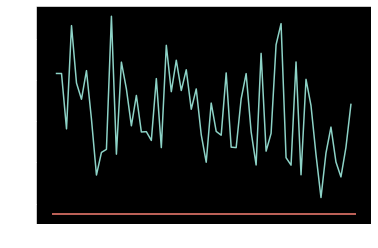

In [71]:
fig,ax=plt.subplots()
ax.hlines(fwhm_free,0,61,'C3')
ax.plot(range(1,61),fwhm_df)


In [72]:
fwhm_ds = (fwhm_df**(5/3) - fwhm_free**(5/3))**(3/5)

(array([ 1.,  3.,  4., 11., 11.,  2., 10.,  9.,  6.,  3.]),
 array([0.03578295, 0.04846384, 0.06114474, 0.07382563, 0.08650652,
        0.09918742, 0.11186831, 0.12454921, 0.1372301 , 0.14991099,
        0.16259189]),
 <a list of 10 Patch objects>)

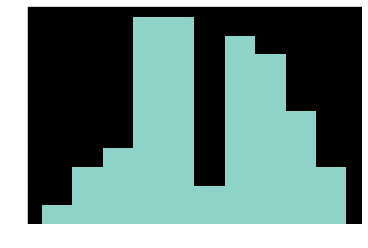

In [73]:
fig,ax = plt.subplots()
ax.hist(fwhm_ds)


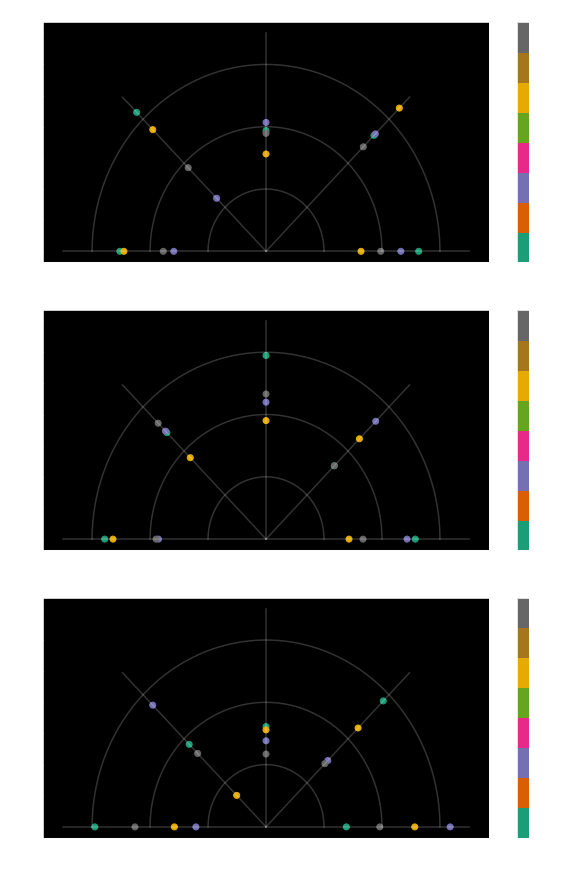

In [101]:
wind_speed = [2,7,12,17]
wind_azimuth = np.arange(5)*45
zenith = [0,30,60]
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10, 15))
k = 0
l = 0.175
for (iz,z) in enumerate(zenith):
    x = []
    y = []
    c = []
    for ws in wind_speed:
        for wa in wind_azimuth:
            x += [fwhm_ds[k]*np.cos(wa*np.pi/180)]
            y += [fwhm_ds[k]*np.sin(wa*np.pi/180)]
            c += [ws]
            k+=1
    ax = axs[iz]
    h = ax.scatter(x, y, c=c, cmap='Dark2')
    fig.colorbar(h,ax=ax, label="Wind speed [m/s]")
    for wa in wind_azimuth:
        ax.plot([0, l*np.cos(wa*np.pi/180)], [0, l*np.sin(wa*np.pi/180)],'w',alpha=0.2)
    o = np.linspace(0,np.pi,101)
    (xs,ys) = (np.cos(o),np.sin(o))
    for s in [0.05,0.1,0.15]:
        ax.plot(s*xs,s*ys,'w',alpha=0.2)
    #ax.grid(alpha=0.2)
    ax.set_title(f"zenith: {z}deg")
    axs[-1].set_xlabel("Dome seing FWHM [arcsec]")

In [102]:
import glob

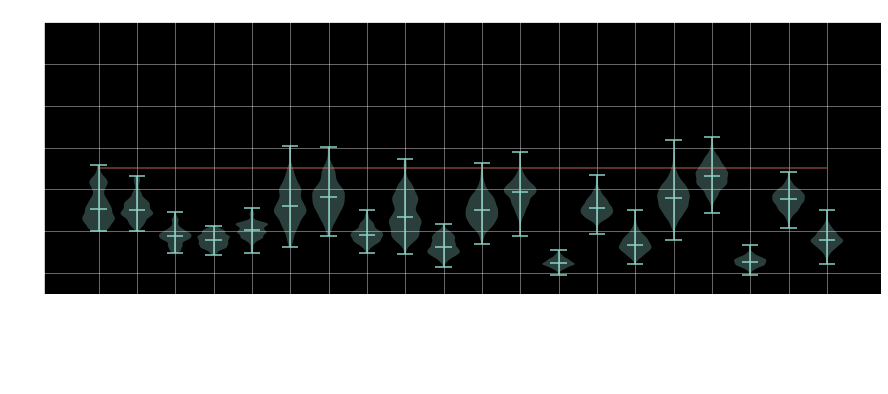

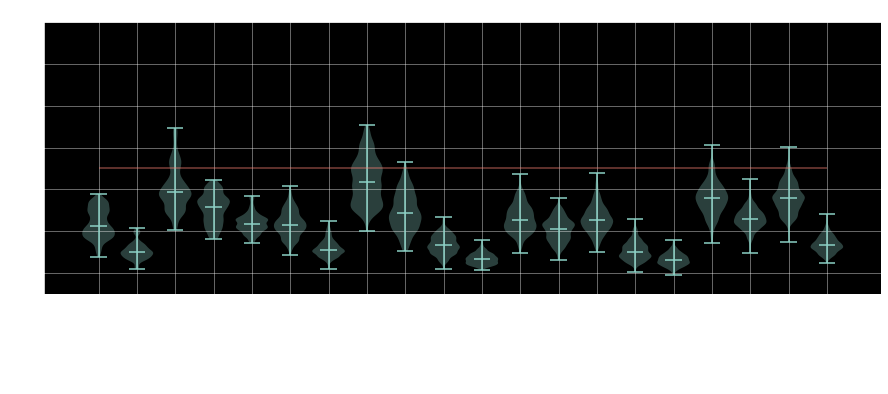

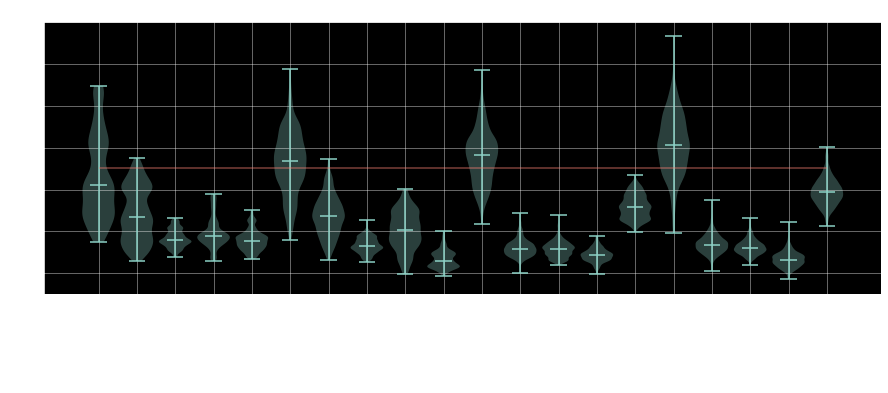

In [171]:
cfd_root = "/fsx/CASES/"
pos = range(1, 21)
for (iz, z) in enumerate(zenith):
    fig, ax = plt.subplots(figsize=(15, 5))
    wfe_rms = []
    cfd_cases = []
    for ws in wind_speed:
        for wa in wind_azimuth:
            if ws<=7:
                cfd_case = f"zen{z:02}az{wa:03}_OS{ws}"
            else:
                if z>30:
                    cfd_case = f"zen{z:02}az{wa:03}_CS{ws}"
                else:
                    cfd_case = f"zen{z:02}az{wa:03}_CD{ws}"
            cfd_cases += [cfd_case]
            data = pd.read_parquet(f"{cfd_root}/{cfd_case}/stats_domeseeing.parquet")
            wfe_rms+=[np.vstack(data['WfeRms'])]
    ax.violinplot(1e6*np.hstack(wfe_rms), pos, widths=0.85, showmedians=True)
    ax.hlines(atm_wfs_rms,1,20,"C3",alpha=0.5)
    ax.set_xticks(pos)
    ax.set_xticklabels(cfd_cases, rotation=60)
    ax.grid(alpha=0.5)
    ax.set_title(f"zenith: {z}deg")
    ax.set_ylabel("Dome Seeing WFE RMS [micron]")
    ax.set_ylim([0.25,3.5])

In [160]:
from scipy.special import gamma

In [165]:
atm_wfs_rms = 0.5*np.sqrt((gamma(11/6)*gamma(5/6))*(24*gamma(6/5)/5)**(5/6)*(0.14/25)**(-5/3)/(2*np.pi**(8/3)))/(2*np.pi)


In [166]:
atm_wfs_rms


1.7593067344134028

In [177]:
(180*3600/np.pi)*0.5e-6/0.50

0.20626480624709637

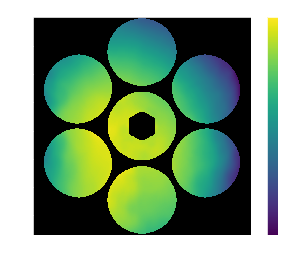

In [15]:
data = np.load(
    "/home/ubuntu/projects/CFDRayTRacing/cfd_raytrace/data/optvol_optvol_3.000000e+02.pkl",allow_pickle=True)
plt.imshow(np.asarray(data).reshape(769,769))
plt.colorbar()

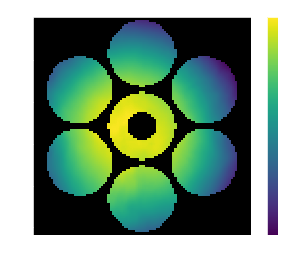

In [20]:
data = np.load(
    "/fsx/CASES/zen30az000_OS7/optvol/104/optvol_optvol_3.000000e+02.pkl", allow_pickle=True)
plt.imshow(np.asarray(data).reshape(104, 104))
plt.colorbar()


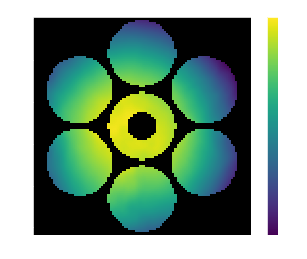

In [ ]:
data = np.load(
    "/home/ubuntu/projects/CFDRayTRacing/cfd_raytrace/data/opd.pkl", allow_pickle=True)
plt.imshow(np.asarray(data).reshape(104, 104))
plt.colorbar()


In [40]:
b_var = np.load("kl_var.pkl",allow_pickle=True)

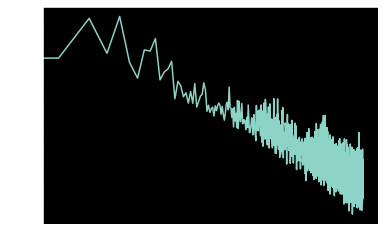

In [41]:
fig,ax = plt.subplots()
ax.loglog(np.arange(len(b_var)),b_var)

In [ ]:
1/5e-2
